In [2]:
# Nguyen Hai Duong
# nhduong_3010@live.com
# Chonnam National University
# 2018.01.21

# Overview
- WIKI dataset (face images + gender + age + ...)
  + Goal: classifying human gender
  + Input: a 64x64 image
  + Output: gender (female or male)
- Defining an CNN+MLP for WIKI dataset
- Training and evaluating an CNN+MLP

# Import libraries

In [3]:
import keras
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import time
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
num_classes = 2   # male vs. female

# (1) Data

### Download data at https://drive.google.com/open?id=0BxINLo5jshCRYW8xODhNSlkyLTQ
This source code and npy files MUST be in the same location

In [5]:
x_train = np.load('64_64_11938_4098_train_x_onehot.npy')
y_train = np.load('64_64_11938_4098_train_y_onehot.npy')
x_train = np.rot90(x_train, k=3, axes=(1, 2))

x_test = np.load('64_64_5968_4098_val_x_onehot.npy')
y_test = np.load('64_64_5968_4098_val_y_onehot.npy')
x_test = np.rot90(x_test, k=3, axes=(1, 2))

# (2) Declare model

In [6]:
# 64x64 portray image
input_image = Input(shape=(64, 64, 1), name='Input')

# conv, pooling layers + dropout
x = Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', name='conv1_1')(input_image)
x = Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', name='conv1_2')(x)
x = MaxPooling2D(pool_size=(2, 2), name='pool1')(x)
x = Dropout(rate=0.2, name='conv_dropout1')(x)

x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', name='conv2_1')(x)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', name='conv2_2')(x)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', name='conv2_3')(x)
x = MaxPooling2D(pool_size=(2, 2), name='pool2')(x)
x = Dropout(rate=0.2, name='conv_dropout2')(x)

x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', name='conv3_1')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', name='conv3_2')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', name='conv3_3')(x)
x = MaxPooling2D(pool_size=(2, 2), name='pool3')(x)
x = Dropout(rate=0.2, name='conv_dropout3')(x)

x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', name='conv4_1')(x)
x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', name='conv4_2')(x)
x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', name='conv4_3')(x)
x = MaxPooling2D(pool_size=(2, 2), name='pool4')(x)
x = Dropout(rate=0.2, name='conv_dropout4')(x)

x = Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu', name='conv5_1')(x)
x = Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu', name='conv5_2')(x)
x = Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu', name='conv5_3')(x)
x = MaxPooling2D(pool_size=(2, 2), name='pool5')(x)
x = Dropout(rate=0.2, name='conv_dropout5')(x)

# similar to the MLP example!
# matrix ---> vector
x = Flatten(name='flatten')(x)

# FC layers + dropout
x = Dense(units=1024, activation='relu', name='fc1')(x)
x = Dropout(rate=0.2, name='fc_dropout1')(x)

x = Dense(units=1024, activation='relu', name='fc2')(x)
x = Dropout(rate=0.2, name='fc_dropout2')(x)

output_label = Dense(units=num_classes, activation='softmax', name='fc3_10ways_softmax')(x)

# define model
model = Model(inputs=input_image, outputs=output_label, name='mnist_mlp')

# print model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 64, 64, 1)         0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 64, 64, 16)        160       
_________________________________________________________________
conv1_2 (Conv2D)             (None, 64, 64, 16)        2320      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 32, 32, 16)        0         
_________________________________________________________________
conv_dropout1 (Dropout)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2_2 (Conv2D)             (None, 32, 32, 32)        9248      
__________

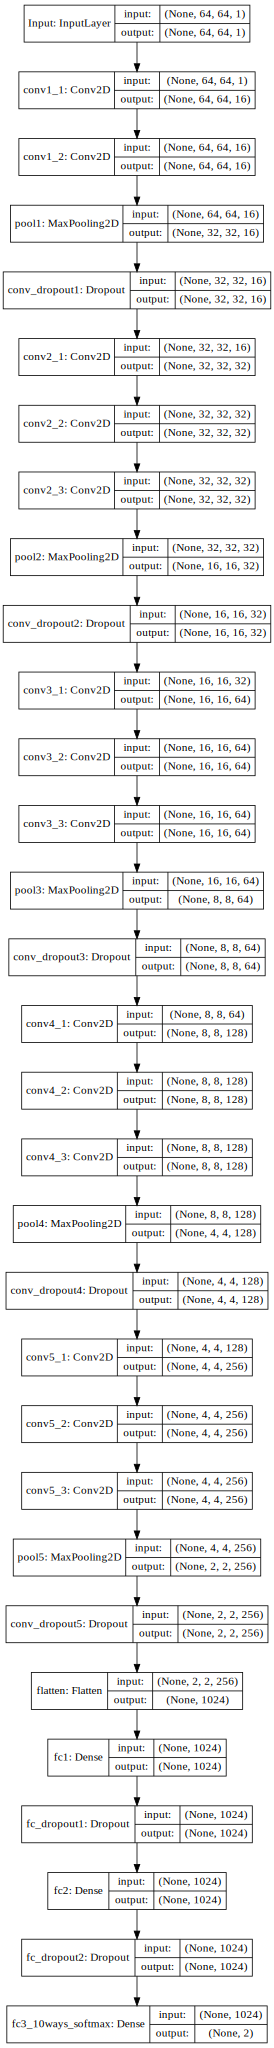

In [7]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# (3) Train defined model
- Note that the training history including loss and accuracy will be save in 'history' variable
- In case your system runs out of memory (OOM), try to decrease batch size

In [24]:
# declare learning rate, loss function, and model metric
loss = 'categorical_crossentropy'
lr = 0.0001
model.compile(loss=loss, optimizer=Adam(lr=lr), metrics=['accuracy'])

# train the model
batch_size = 128
epochs = 30

starting_time = time.time()
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batch_size,
                    epochs=epochs)
print('> training time is %.4f minutes' % ((time.time() - starting_time)/60))

Train on 11938 samples, validate on 5968 samples
Epoch 1/30
11938/11938 [==============================] - 8s 643us/step - loss: 0.5481 - acc: 0.7861 - val_loss: 0.5386 - val_acc: 0.7885
Epoch 2/30
11938/11938 [==============================] - 6s 481us/step - loss: 0.5105 - acc: 0.7885 - val_loss: 0.5036 - val_acc: 0.7885
Epoch 3/30
11938/11938 [==============================] - 6s 483us/step - loss: 0.4885 - acc: 0.7891 - val_loss: 0.4872 - val_acc: 0.7986
Epoch 4/30
11938/11938 [==============================] - 6s 487us/step - loss: 0.4687 - acc: 0.8006 - val_loss: 0.4730 - val_acc: 0.8081
Epoch 5/30
11938/11938 [==============================] - 6s 478us/step - loss: 0.4564 - acc: 0.8062 - val_loss: 0.4424 - val_acc: 0.8147
Epoch 6/30
11938/11938 [==============================] - 6s 474us/step - loss: 0.4450 - acc: 0.8140 - val_loss: 0.4383 - val_acc: 0.8148
Epoch 7/30
11938/11938 [==============================] - 6s 483us/step - loss: 0.4338 - acc: 0.8191 - val_loss: 0.4381 - v

### Training time
- Training time with GTX 1080 is about 2.9352 minutes for 30 epochs
- Training time with Core i7 is around 109 minutes for 30 epochs

# (4) Evaluate trained model

In [25]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5968/5968 [==============================] - 1s 241us/step
Test loss: 0.46021558608030827
Test accuracy: 0.8264075067024129


In [87]:
def int2gender(num):
    if num == 0:
        return 'female'
    else:
        return 'male'

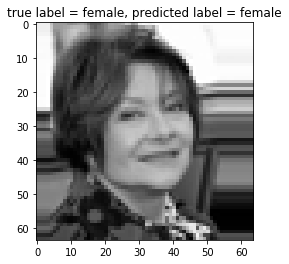

In [97]:
# select a test image randomly
random_test_index = np.random.choice(x_test.shape[0], size=1)[0]
test_img = x_test[random_test_index]
test_label = np.argmax(y_test[random_test_index])

# predict test image with trained model
pred_label = model.predict(np.expand_dims(test_img, axis=0))
pred_label = np.argmax(pred_label)

plt.imshow(test_img[:, :, 0], cmap='gray')
plt.title('true label = %s, predicted label = %s' % (int2gender(test_label), int2gender(pred_label)))
plt.show()